# Trabalho final de Machine Learning
- Aluno: Antonio Eudálio de Sousa da Silva
- Matricula: 380038

# Descrição geral do Problema

- Retirado do UCI - Machine Learning Repository
- link de acesso: https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data

### Resumo:

- Este é o conjunto de dados usado para a Terceira Competição Internacional de Ferramentas de Descoberta de Conhecimento e Ferramentas de Mineração de Dados, realizada em conjunto com a KDD-99 A Quinta Conferência Internacional sobre Descoberta de Conhecimento e Mineração de Dados. **A tarefa da competição era construir um detector de intrusão de rede, um modelo preditivo capaz de distinguir entre conexões "ruins", chamadas intrusões ou ataques, e conexões normais "boas". Este banco de dados contém um conjunto padrão de dados a serem auditados, que inclui uma ampla variedade de intrusões simuladas em um ambiente de rede militar.**

### Datasets originais

![datasets-kddcup99-mld](https://github.com/Eudalio/trabalho-final-machine-learning/blob/master/diretorio_datasets.png?raw=true "Diretório dos datasets!")

+ O dataset utilizado dentre os listados foi o nomeado kddcup.data.gz. Porque na especificação apresentava-o como o dataset completo. Utilizei também o kddcup.data_10_percent.gz para experimentos.
+ Não utilizei os outros porque em relação aos datasets dispostos era o que havia sido modificado por último, o que aparentou pra mim que fosse o melhor a ser utilizado pois estaria corrigido.

#### Info Dataset
- 18 MB comprimido
- 743 MB de armazenamento físico
- 42 colunas (Acompanha Label)
- 4898431 linhas

### Trabalhos Relacionados
Com relação a trabalhos relacionados, no repositório do UCI ele lista um artigo relevante e um artigo que cita aquele dataset, apresentados a seguir:
- Cost-based Modeling and Evaluation for Data Mining With Application to Fraud and Intrusion Detection: Results from the JAM Project.
- The UCI KDD Archive of Large Data Sets for Data Mining Research and Experimentation.

Nenhum dos dois citados a pouco foi útil.
Utilizei o trabalho: **Offline/Realtime Traffic Classification Using Semi-Supervised Learning** disponível em http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=63E35A0E7B5FBCD540FE7D221C66CBAB?doi=10.1.1.106.6021&rep=rep1&type=pdf

### Todas Features
![tabela de features 1](https://github.com/Eudalio/trabalho-final-machine-learning/blob/master/feat1.png?raw=true "Tabela com features 1!")
![tabela de features 2](https://github.com/Eudalio/trabalho-final-machine-learning/blob/master/feat2.png?raw=true "Tabela com features 2!")
![tabela de features 3](https://github.com/Eudalio/trabalho-final-machine-learning/blob/master/feat3.png?raw=true "Tabela com features 3!")

### Features mais significantes - Input
- count
- src_bytes
- dst_bytes
- hot
- srv_count
- service
- dst_host_count
- dst_host_srv_count
- dst_host_same_src_port_rate
- dst_host_srv_diff_host_rate

### Labels
- 0 -> Normal
- 1 -> Qualquer outro

### Métricas
- Accurácia
- F1-score
- **Roc**
- **Recall**

Os dois últimos sendo as métricas mas importantes para a avaliação."

## import libs

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import sort

from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn import linear_model as lm
from sklearn import naive_bayes

from xgboost import XGBClassifier, plot_importance

In [2]:
nomes_features = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 
                  'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
                  'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
                  'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
                  'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
                  'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
                  'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                  'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
                  'dst_host_srv_rerror_rate', 'label']

In [3]:
tipos_features = {'duration':int,
                  'src_bytes': int,
                  'dst_bytes': int, 
                  'land': int, 
                  'wrong_fragment': int, 
                  'urgent': int,
                  'hot': int,
                  'num_failed_logins': int,
                  
                  'logged_in': int,
                  'num_compromised': int,
                  'root_shell': int, 
                  'su_attempted': int,
                  'num_root': int,
                  'num_file_creations': int, 
                  'num_shells': int,
                  'num_access_files': int,
                  'num_outbound_cmds': int,
                  'is_host_login': int, 
                  
                  'is_guest_login': int,
                  'count': int,
                  'srv_count': int,
                  'serror_rate': float,
                  'srv_serror_rate': float,
                  'rerror_rate': float,
                  'srv_rerror_rate': float, 
                  'same_srv_rate': float,
                  'diff_srv_rate': float, 
                  'srv_diff_host_rate': float, 
                  
                  'dst_host_count': int, 
                  'dst_host_srv_count': int, 
                  'dst_host_same_srv_rate': float,
                  'dst_host_diff_srv_rate': float, 
                  'dst_host_same_src_port_rate': float,
                  'dst_host_srv_diff_host_rate': float,
                  'dst_host_serror_rate': float,
                  'dst_host_srv_serror_rate': float, 
                  'dst_host_rerror_rate': float, 
                  'dst_host_srv_rerror_rate': float,}

### import dataset

In [4]:
df_completo = pd.read_csv('kddcup.data_10_percent_corrected.csv', names=nomes_features, dtype=tipos_features, header=None)

## understanding of the data

In [5]:
df_completo.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


In [6]:
df_completo.shape

(494021, 42)

In [7]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

### pre processing

#### Function that converts categorical data to numeric

In [8]:
def cat2numeric_map(df):
    map_replace = {}
    for column in df:
        if not np.issubdtype(df[column].dtype, np.number):
            elements = np.unique(df[column])
            map_replace[column] = { elements[i]: i for i in range(elements.size) }  
    return map_replace

In [9]:
map_replace = cat2numeric_map(df_completo)
map_replace

{'flag': {'OTH': 0,
  'REJ': 1,
  'RSTO': 2,
  'RSTOS0': 3,
  'RSTR': 4,
  'S0': 5,
  'S1': 6,
  'S2': 7,
  'S3': 8,
  'SF': 9,
  'SH': 10},
 'label': {'back.': 0,
  'buffer_overflow.': 1,
  'ftp_write.': 2,
  'guess_passwd.': 3,
  'imap.': 4,
  'ipsweep.': 5,
  'land.': 6,
  'loadmodule.': 7,
  'multihop.': 8,
  'neptune.': 9,
  'nmap.': 10,
  'normal.': 11,
  'perl.': 12,
  'phf.': 13,
  'pod.': 14,
  'portsweep.': 15,
  'rootkit.': 16,
  'satan.': 17,
  'smurf.': 18,
  'spy.': 19,
  'teardrop.': 20,
  'warezclient.': 21,
  'warezmaster.': 22},
 'protocol_type': {'icmp': 0, 'tcp': 1, 'udp': 2},
 'service': {'IRC': 0,
  'X11': 1,
  'Z39_50': 2,
  'auth': 3,
  'bgp': 4,
  'courier': 5,
  'csnet_ns': 6,
  'ctf': 7,
  'daytime': 8,
  'discard': 9,
  'domain': 10,
  'domain_u': 11,
  'echo': 12,
  'eco_i': 13,
  'ecr_i': 14,
  'efs': 15,
  'exec': 16,
  'finger': 17,
  'ftp': 18,
  'ftp_data': 19,
  'gopher': 20,
  'hostnames': 21,
  'http': 22,
  'http_443': 23,
  'imap4': 24,
  'iso_tsa

In [5]:
map_replace = {
    
    'flag': {'OTH': 0, 'REJ': 1, 'RSTO': 2, 'RSTOS0': 3, 'RSTR': 4, 'S0': 5, 'S1': 6, 'S2': 7, 'S3': 8, 'SF': 9, 'SH': 10},
    
    'protocol_type': {'tcp': 0, 'udp': 1, 'icmp': 3},
    
    'label': {'normal.': 0, 'back.': 1, 'buffer_overflow.': 1, 'ftp_write.': 1, 'guess_passwd.': 1, 'imap.': 1, 'ipsweep.': 1, 'land.': 1,
              'loadmodule.': 1, 'multihop.': 1, 'neptune.': 1, 'nmap.': 1, 'perl.': 1, 'phf.': 1, 'pod.': 1, 'portsweep.': 1, 'rootkit.': 1, 'satan.': 1,
              'smurf.': 1, 'spy.': 1, 'teardrop.': 1, 'warezclient.': 1, 'warezmaster.': 1},
    
    'service': {'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10,
                'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20,
                'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29,
                'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38,
                'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47,
                'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57,
                'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i': 65, 'uucp': 66, 'uucp_path': 67,
                'vmnet': 68, 'whois': 69}
}

#### Dataset refactoring

In [6]:
df_completo_conv = df_completo.replace(map_replace)

In [7]:
del df_completo

In [12]:
df_completo_conv.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,24,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,0
1,0,0,24,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,0
2,0,0,24,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0
3,0,0,24,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0
4,0,0,24,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0
5,0,0,24,9,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0
6,0,0,24,9,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,0
7,0,0,24,9,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,0
8,0,0,24,9,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,0
9,0,0,24,9,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,0


In [13]:
df_completo_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null int64
service                        494021 non-null int64
flag                           494021 non-null int64
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 non

#### Distribuição das labels

Text(0,0.5,'Frequencia')

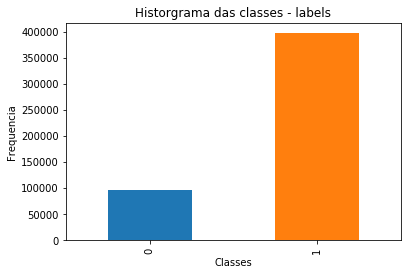

In [15]:
count_classes = pd.value_counts(df_completo_conv['label'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Historgrama das classes - labels")
plt.xlabel("Classes")
plt.ylabel("Frequencia")

### Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72d8e506a0>]],
      dtype=object)

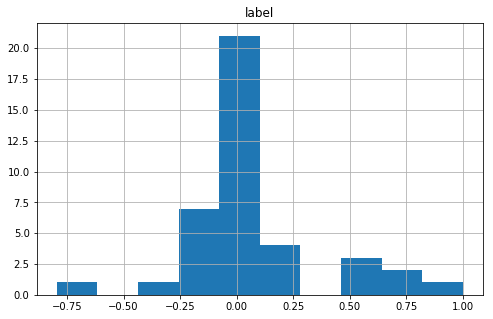

In [16]:
corr = df_completo_conv.corr()
corr[['label']].hist(figsize=(8,5))

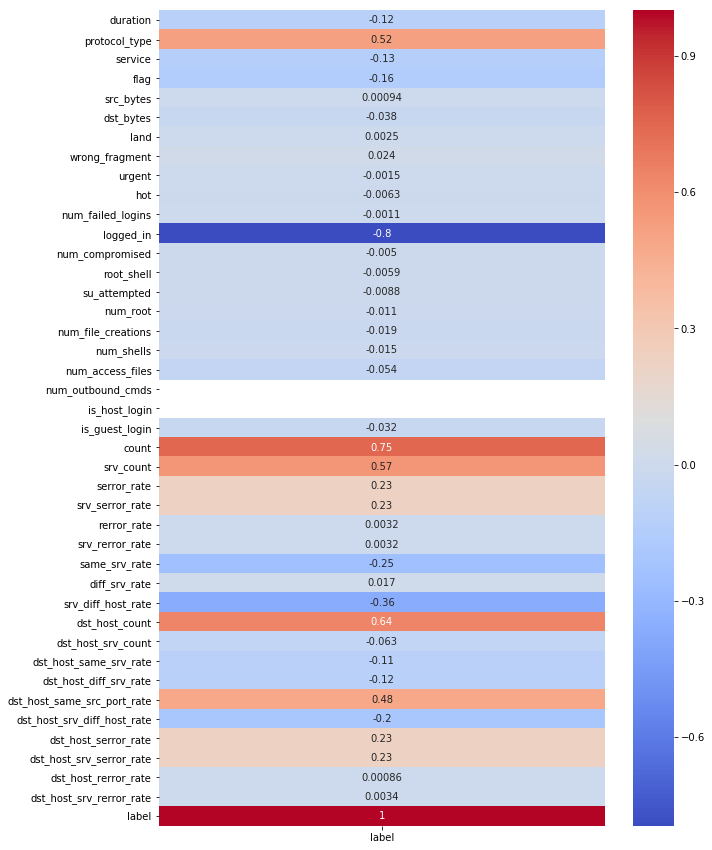

In [17]:
plt.figure(figsize=(10,15))
sns.heatmap(corr[['label']], cmap='coolwarm', annot=True)

### Standardizing dataset 

In [18]:
# Train/Test Split
X, y = df_completo_conv.iloc[:, :41].values, df_completo_conv.iloc[:,41:].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [19]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

### Feature importance

#### Decision Tree

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

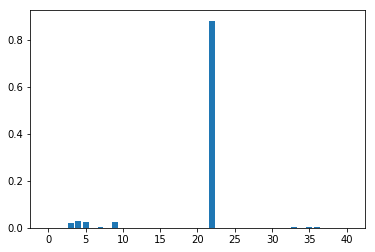

In [21]:
plt.bar(range(len(dtree.feature_importances_)), dtree.feature_importances_)
plt.show()

#### Random Forest

In [22]:
randomf = RandomForestClassifier()
randomf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

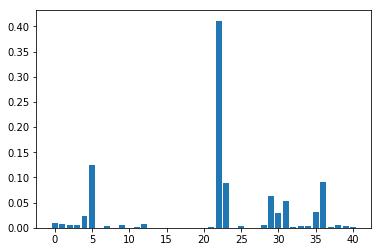

In [23]:
plt.bar(range(len(randomf.feature_importances_)), randomf.feature_importances_)
plt.show()

#### X Gradient Boost

In [24]:
modeloXGB = XGBClassifier()
modeloXGB.fit(X_train_std, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

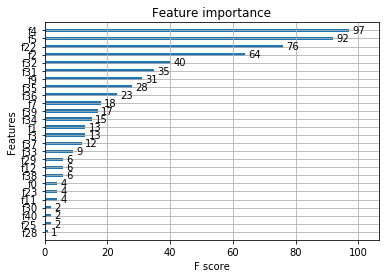

In [25]:
plot_importance(modeloXGB, height=0.4)
plt.show()

## Modeling

##### Todas as colunas do dataset original standardizado

In [8]:
drop_collums = np.array(df_completo_conv.columns)

##### Criado array com todos as colunas que não utilizarei mais

In [9]:
new_drop_collums = np.delete(drop_collums, [2, 4, 5, 9, 22, 23, 31, 32, 35, 36, 41])

##### Criado um novo data frame que contém apenas as features mais significantes

In [10]:
df_reduz = pd.DataFrame(data=df_completo_conv)
df_reduz = df_reduz.drop(columns=new_drop_collums)
df_reduz.head()

,service,src_bytes,dst_bytes,hot,count,srv_count,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,label
0,24,181,5450,0,8,8,9,9,0.11,0.0,0
1,24,239,486,0,8,8,19,19,0.05,0.0,0
2,24,235,1337,0,8,8,29,29,0.03,0.0,0
3,24,219,1337,0,6,6,39,39,0.03,0.0,0
4,24,217,2032,0,6,6,49,49,0.02,0.0,0


In [11]:
del df_completo_conv

In [12]:
# Train/Test Split
X_, y_ = df_reduz.iloc[:, :10].values, df_reduz.iloc[:,10:].values

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.3, shuffle=True, random_state=42, stratify=y_)

In [13]:
std_ = StandardScaler()
X_train_std_ = std_.fit_transform(X_train_)
X_test_std_ = std_.transform(X_test_)

#### Model - X Gradient Boost

In [12]:
# fit model on all training data
modelXGB = XGBClassifier()
modelXGB.fit(X_train_std_, y_train_)
# make predictions for test data and evaluate
y_pred = modelXGB.predict(X_test_std_)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test_, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(modelXGB.feature_importances_)
print('thresholds: ' + str(thresholds))
for thresh in thresholds:
    # select features using threshold
    print('thresh: ' + str(thresh))
    selection = SelectFromModel(modelXGB, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_std_)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train_)
    # eval model
    select_X_test = selection.transform(X_test_std_)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test_, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 99.91%
thresholds: [0.01743265 0.03486529 0.04912837 0.04912837 0.05229794 0.11093502
 0.14580032 0.15055467 0.16481775 0.22503962]
thresh: 0.017432647


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.017, n=10, Accuracy: 99.91%
thresh: 0.034865294


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.035, n=9, Accuracy: 99.92%
thresh: 0.04912837


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.049, n=8, Accuracy: 99.90%
thresh: 0.04912837


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.049, n=8, Accuracy: 99.90%
thresh: 0.05229794


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.052, n=6, Accuracy: 99.89%
thresh: 0.110935025


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.111, n=5, Accuracy: 99.89%
thresh: 0.14580032


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.146, n=4, Accuracy: 99.89%
thresh: 0.15055467


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.151, n=3, Accuracy: 99.66%
thresh: 0.16481775


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.165, n=2, Accuracy: 98.83%
thresh: 0.22503962


/home/eudalio/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.225, n=1, Accuracy: 98.64%


- Se com 6 features ou menos eu consigo uma acurácia de 99.89%, significa que posso tranquilamente excluir as outras features porque pelo que aparenta não apresentam relevância suficiente para mantê-las.

#### Function to automate models

In [14]:
nSplits = 5
kfold = StratifiedKFold(n_splits=nSplits)
def classifier(model, X, y):
    acc = 0.0
    f1 = 0.0
    roc = 0.0
    recall = 0.0
    for train_index, test_index in kfold.split(X, y):
        X_train, y_train = X[train_index], y[train_index]
        X_test, y_test = X[test_index], y[test_index]
        
        model.fit(X_train, y_train)
        ŷ = model.predict(X_test)
        
        acc += accuracy_score(y_test, ŷ)
        f1 += f1_score(y_test, ŷ)
        recall += recall_score(y_test, ŷ)
        roc += roc_auc_score(y_test, ŷ)
        
    print("Acc: {}".format(acc/nSplits))
    print("F1-score: {}".format(f1/nSplits))
    print("Recall: {}".format(recall/nSplits))
    print("Roc: {}".format(roc/nSplits))
    return [recall/nSplits, roc/nSplits]

##### Model Random Forest

In [15]:
rf = RandomForestClassifier()
mrf = classifier(rf, X_train_std_, y_train_)
mrf

Acc: 0.9996819100120696
F1-score: 0.9998019364387941
Recall: 0.9996975370877144
Roc: 0.9996578544719151


[0.9996975370877144, 0.9996578544719151]

#### Model - KNN

In [ ]:
knn = neighbors.KNeighborsClassifier()
mknn = classifier(knn, X_train_std_, y_train_)
mknn

#### Model - Naive Bayes

In [16]:
nb = naive_bayes.GaussianNB()
mnb = classifier(nb, X_train_std_, y_train_)
mnb

Acc: 0.9771235427911442
F1-score: 0.9856018215992288
Recall: 0.9749711940083537
Roc: 0.9804365204800156


[0.9749711940083537, 0.9804365204800156]

#### Model - Logistic Regression - L1

In [38]:
lr = lm.LogisticRegression(penalty='l1')
mlr_l1 = classifier(lr, X_train_std_, y_train_)
mlr_l1

Acc: 0.976310988033062
F1-score: 0.9852952608940232
Recall: 0.9874477891401412
Roc: 0.959169155504427


[0.9874477891401412, 0.959169155504427]

#### Model - Logistic Regression - L2

In [37]:
lr = lm.LogisticRegression(penalty='l2')
mlr_l2 = classifiallrocs.append(mlr[1])er(lr, X_train_std_, y_train_)
mlr_l2

Acc: 0.9838815092585055
F1-score: 0.9898924438220102
Recall: 0.9828280282298719
Roc: 0.9855030777218415


[0.9828280282298719, 0.9855030777218415]

In [39]:
# Juntando todos os nomes do metodos
class_names = []
class_names.append('RF')
class_names.append('NB')
class_names.append('LR1')
class_names.append('LR2')
print("All the class names: {}".format(class_names))
#Juntando todos os recalls
allrecalls = []
allrecalls.append(mrf[0])
allrecalls.append(mnb[0])
allrecalls.append(mlr_l1[0])
allrecalls.append(mlr_l2[0])
print("All recalls: {}".format(allfscores))

#Juntando todos os roc scores
allrocs = []
allrocs.append(mrf[1])
allrocs.append(mnb[1])
allrocs.append(mlr_l1[1])
allrocs.append(mlr_l2[1])
print("All rocs scores: {}".format(allrocs))

All the class names: ['RF', 'NB', 'LR1', 'LR2']
All recalls: [0.9996975370877144, 0.9749711940083537, 0.9828280282298719]
All rocs scores: [0.9996578544719151, 0.9804365204800156, 0.959169155504427, 0.9855030777218415]


#### Plotando a comparação utilizando o recall

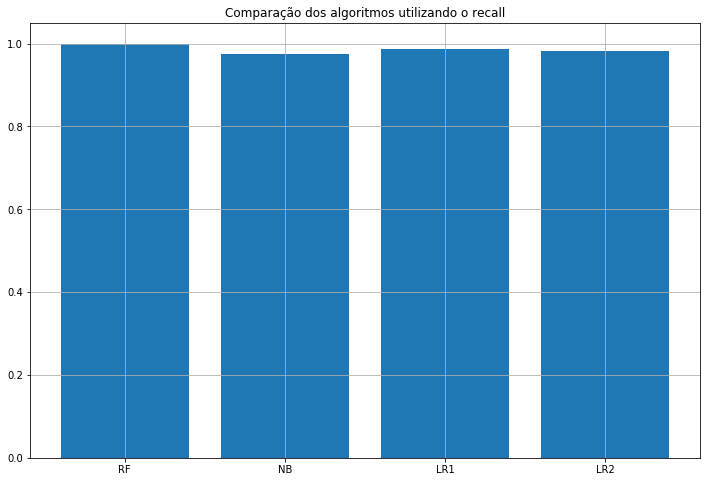

In [40]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Comparação dos algoritmos utilizando o recall')
plt.bar(range(len(class_names)), allrecalls)
plt.xticks(range(len(class_names)), class_names);

#### Plotando a comparação utilizando o roc score

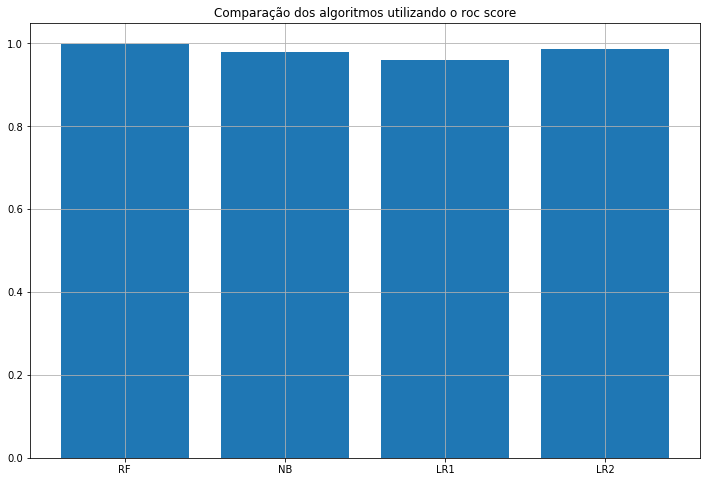

In [41]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Comparação dos algoritmos utilizando o roc score')
plt.bar(range(len(class_names)), allrocs)
plt.xticks(range(len(class_names)), class_names);

# Conclusões

### Aprendizados
- Estudar desde o começo, e começar a fazer o trabalho o quanto antes;
- A estrutura de como seria um trabalho de um Analista de Dados;
- xgboost é top;
- Várias técnicas de análise de dados;
- Respirar fundo (3x) para não quebrar o notebook.

### Dificuldades
- Trabalhar com Datasets muito grandes;
- Recursos disponíveis (Máquina para realização do trabalho, quantidade de memória, qualidade do processador)
- 

### Melhorias futuras
- Conseguir usar o dataset todo.
- Aplicar mais técnicas para ter material para comparação.
- De repente poderia usar mais métricas.